In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

dataset=load_dataset("lukebarousse/data_jobs")
df=dataset["train"].to_pandas()

df["job_posted_date"]=pd.to_datetime(df["job_posted_date"])
df["job_skills"]=df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
#just to test everything:

#df.info()  para ver se converteu a coluna

# type(df["job_skills"][1])
# df["job_skills"][1]

['r', 'python', 'sql', 'nosql', 'power bi', 'tableau']

In [3]:
df_US=df[df["job_country"]=="United States"]
#df_US["job_country"].value_counts() - to show that i only have US jobs

df_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","[sql, python, java, sql server, gcp, bigquery,...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785673,Data Scientist,Asset Management Data Scientist,"New York, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-16 06:01:53,True,False,United States,None,NaN,NaN,JPMorgan Chase & Co.,None,None
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


In [4]:
df_skills=df_US.explode("job_skills")
df_skills[["job_title_short","job_skills"]]

#In here as a safeguard i could've done something like:
#df_skills = (df_US.explode("job_skills").reset_index(drop=True)[["job_title_short", "job_skills"]])
#this would've cleaned the index.

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


In [5]:
df_skills_count = df_skills.groupby(["job_skills","job_title_short"]).size()
df_skills_count



job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [8]:
type(df_skills_count)
#dá series e queremos uma dataframe

pandas.core.series.Series

In [9]:
print(df_skills_count.index)

MultiIndex([('airflow',          'Business Analyst'),
            ('airflow',            'Cloud Engineer'),
            ('airflow',              'Data Analyst'),
            ('airflow',             'Data Engineer'),
            ('airflow',            'Data Scientist'),
            ('airflow', 'Machine Learning Engineer'),
            ('airflow',       'Senior Data Analyst'),
            ('airflow',      'Senior Data Engineer'),
            ('airflow',     'Senior Data Scientist'),
            ('airflow',         'Software Engineer'),
            ...
            (   'zoom',          'Business Analyst'),
            (   'zoom',            'Cloud Engineer'),
            (   'zoom',              'Data Analyst'),
            (   'zoom',             'Data Engineer'),
            (   'zoom',            'Data Scientist'),
            (   'zoom', 'Machine Learning Engineer'),
            (   'zoom',       'Senior Data Analyst'),
            (   'zoom',      'Senior Data Engineer'),
            

In [6]:
df_skills_count=df_skills_count.reset_index(name="skill_count") #.sort_values(by="skill_count", ascending=False, inplace=True)
#could'v done it all in just one line but already had committed the reset index and now i have to do the sorting separately.


In [7]:
df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,38
1,airflow,Cloud Engineer,27
2,airflow,Data Analyst,387
3,airflow,Data Engineer,4716
4,airflow,Data Scientist,1166
...,...,...,...
1865,zoom,Machine Learning Engineer,5
1866,zoom,Senior Data Analyst,50
1867,zoom,Senior Data Engineer,30
1868,zoom,Senior Data Scientist,25


In [8]:
df_skills_count.sort_values(by="skill_count", ascending=False, inplace=True)
df_skills_count.head(30)



,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
1522,sql,Data Engineer,23958
1208,python,Data Engineer,22762
1611,tableau,Data Analyst,19311
1207,python,Data Analyst,18382
123,aws,Data Engineer,15018


In [9]:
df_skills_count["job_title_short"].unique()[:4].tolist()

['Data Scientist', 'Data Analyst', 'Data Engineer', 'Senior Data Scientist']

In [10]:
#Lets get the top 3 roles. We could create a list and hardcode it but lets automate the process:
job_titles=df_skills_count["job_title_short"].unique().tolist()
#without the tolist() this would create an array
job_titles = sorted(job_titles[:3])
#sorted is sorting the results in alphabetical order
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

Plotting:

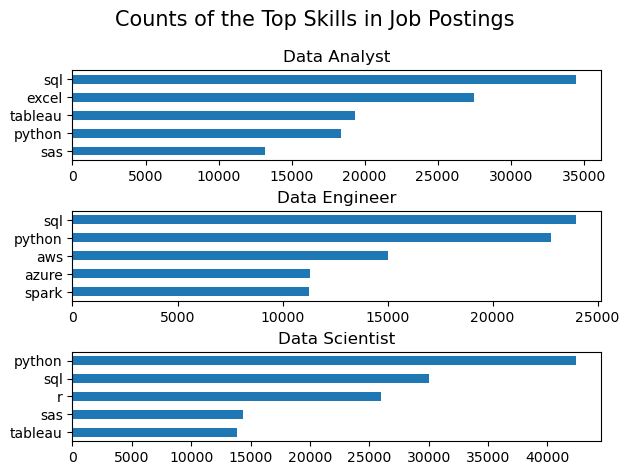

In [13]:
fig, ax=plt.subplots(len(job_titles),1)
#to automate. we are getting the number of graph equal to the len(job_titles) and just one column

#pull out the index and job_title name from the job_titles list
for i, job_title in enumerate(job_titles):
    #we want to plot the df_skills_count but filter by job_title_short and only get the top 5 results
    df_plot=df_skills_count[df_skills_count["job_title_short"]==job_title].head(5)
    #plot:
    df_plot.plot(kind="barh", x="job_skills", y="skill_count", ax=ax[i], title=job_title)
    #let us get the higher values on top on the y axis:
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)

fig.suptitle("Counts of the Top Skills in Job Postings", fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()



In [ ]:
#We want to covert the counts to a percentage
#We already know how many job posts there are for each skill
#We need to divide those values for the total job postings for each role to get the %

In [16]:
#Lets count how many job postings for each role.
#We need to use the original table filtered by jobs in the US

df_US["job_title_short"].value_counts()

#Lets convert to a dataframe using the reset_index 

df_job_title_count = df_US["job_title_short"].value_counts().reset_index(name="jobs_total")

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [17]:
#Now lets merge the dataframes for easy viewing:

df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how="left", on="job_title_short")
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,clojure,Software Engineer,1,1814
1866,vb.net,Senior Data Scientist,1,12946
1867,fortran,Machine Learning Engineer,1,921
1868,planner,Cloud Engineer,1,423


In [18]:
#Creating the % column:

df_skills_perc["skill_percent"]=100*df_skills_perc["skill_count"]/df_skills_perc["jobs_total"]
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


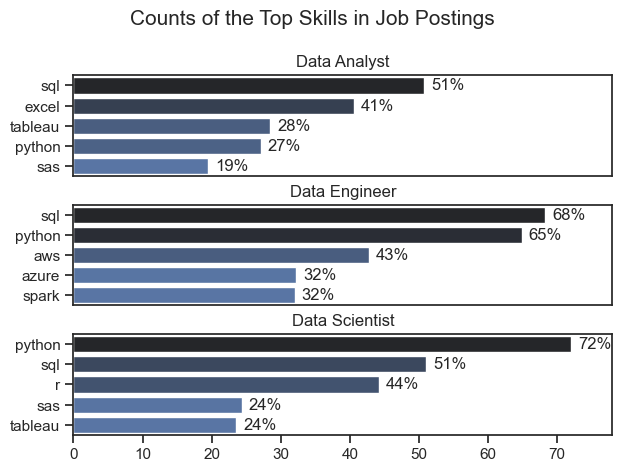

In [ ]:
#Lets plot:
#We have to change the df to the newest we have created
#We have to change the y axis to the skill_percent
#The rest is the same but we are going to clean things a bit using seaborn:

fig, ax=plt.subplots(len(job_titles),1)
#to automate. we are getting the number of graph equal to the len(job_titles) and just one column

sns.set_theme(style="ticks") #to make the color more smooth

#pull out the index and job_title name from the job_titles list
for i, job_title in enumerate(job_titles):
    #we want to plot the df_skills_count but filter by job_title_short and only get the top 5 results
    df_plot=df_skills_perc[df_skills_perc["job_title_short"]==job_title].head(5)
    #plot:
    # matplotlib: df_plot.plot(kind="barh", x="job_skills", y="skill_percent", ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x="skill_percent", y="job_skills", ax=ax[i], hue="skill_count", palette="dark:b_r")
    #let us get the higher values on top on the y axis:
    #ax[i].invert_yaxis() in seaborn we don't need this because unlike matplotlib it won't plot backwards
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].set_title(job_title)
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,78)
  
    #We want to include the percentages on each bar:
    for n, v in enumerate(df_plot["skill_percent"]):
    #cycle the index (n) and the value (v) in the skill_percent column of df_plot
    #we want the index so we use the enumerate
        ax[i].text(v+1, n, f'{v:.0f}%', va="center")
        #the text function, we have to provide the coordinates x,y and the value we want.
        # x position is the value of x plus 1 so that the % won't be too close to the bar
        # y position is n, the index of the skill
        # the value we want is the value v with 0 decimal places and floating point to round up
        # va="center" to center the % on each line
 
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])
        #delete the numbers on the axis of the 1st and 2nd plot, but leave on the last plot.

fig.suptitle("Counts of the Top Skills in Job Postings", fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()
